In [1]:
import torch
import numpy as np
from luwiji.neural_network import illustration, demo

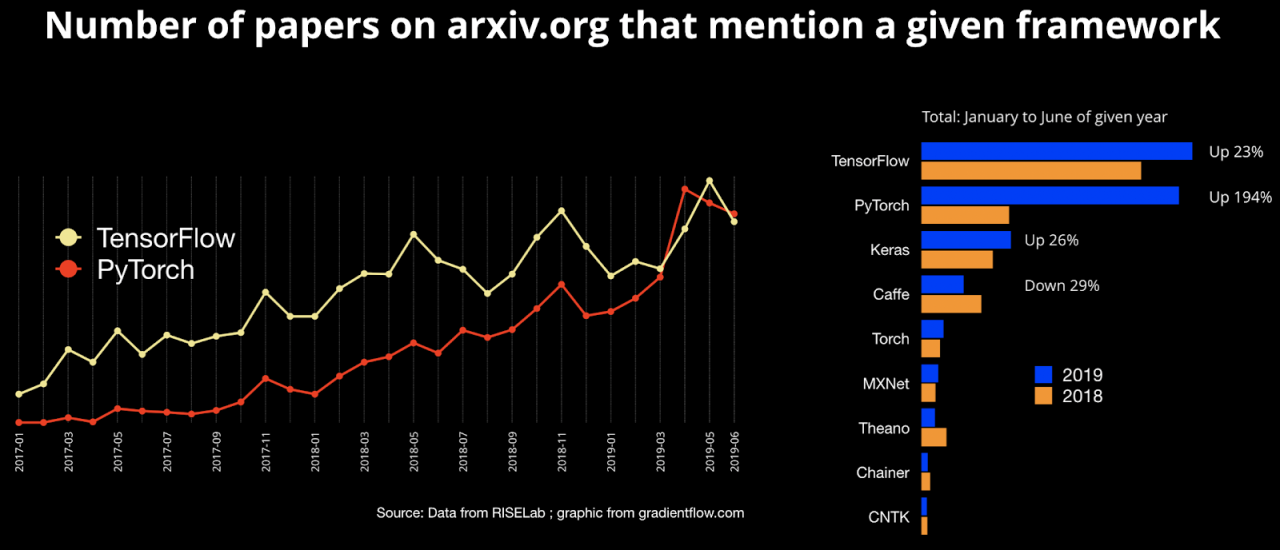

In [2]:
illustration.pytorch

# Sample data

In [3]:
a = demo.example_data_1
a

array([[[149, 218, 105,  92, 177],
        [ 48,  49,  46,  56, 230],
        [ 18,  56, 161, 220,  54],
        [ 81,  41, 121,  74, 111],
        [208, 162, 106, 207,  25]],

       [[154, 111,  78, 240,  47],
        [124,  30, 173,  46,  68],
        [ 91,  43, 206, 178, 221],
        [ 46, 124,  79, 134, 101],
        [ 47, 194,  22, 242,   7]],

       [[181, 214, 216, 233, 204],
        [108, 173, 101, 167, 106],
        [115, 144, 195, 180,  63],
        [236,  53, 145, 187, 203],
        [ 81,  91,  88, 127, 120]]])

# Tensor

In [4]:
torch.LongTensor(a)

tensor([[[149, 218, 105,  92, 177],
         [ 48,  49,  46,  56, 230],
         [ 18,  56, 161, 220,  54],
         [ 81,  41, 121,  74, 111],
         [208, 162, 106, 207,  25]],

        [[154, 111,  78, 240,  47],
         [124,  30, 173,  46,  68],
         [ 91,  43, 206, 178, 221],
         [ 46, 124,  79, 134, 101],
         [ 47, 194,  22, 242,   7]],

        [[181, 214, 216, 233, 204],
         [108, 173, 101, 167, 106],
         [115, 144, 195, 180,  63],
         [236,  53, 145, 187, 203],
         [ 81,  91,  88, 127, 120]]])

In [5]:
a = torch.FloatTensor(a)
a

tensor([[[149., 218., 105.,  92., 177.],
         [ 48.,  49.,  46.,  56., 230.],
         [ 18.,  56., 161., 220.,  54.],
         [ 81.,  41., 121.,  74., 111.],
         [208., 162., 106., 207.,  25.]],

        [[154., 111.,  78., 240.,  47.],
         [124.,  30., 173.,  46.,  68.],
         [ 91.,  43., 206., 178., 221.],
         [ 46., 124.,  79., 134., 101.],
         [ 47., 194.,  22., 242.,   7.]],

        [[181., 214., 216., 233., 204.],
         [108., 173., 101., 167., 106.],
         [115., 144., 195., 180.,  63.],
         [236.,  53., 145., 187., 203.],
         [ 81.,  91.,  88., 127., 120.]]])

# Shape

In [6]:
a.shape

torch.Size([3, 5, 5])

# Reshape

In [7]:
a = a.view(3, -1)
a.shape

torch.Size([3, 25])

In [8]:
a = a.view(1, 3, 5, 5)
a.shape

torch.Size([1, 3, 5, 5])

# Permute

kalau misalnya kita maunya `torch.Size([1, 5, 5, 3])`

In [9]:
a.permute(0, 2, 3, 1).shape

torch.Size([1, 5, 5, 3])

# Squeeze & Unsqueeze

In [10]:
a.squeeze().shape

torch.Size([3, 5, 5])

In [11]:
a.unsqueeze(0).shape

torch.Size([1, 1, 3, 5, 5])

# Konversi torch tensor ke Numpy array

In [12]:
a.numpy()

array([[[[149., 218., 105.,  92., 177.],
         [ 48.,  49.,  46.,  56., 230.],
         [ 18.,  56., 161., 220.,  54.],
         [ 81.,  41., 121.,  74., 111.],
         [208., 162., 106., 207.,  25.]],

        [[154., 111.,  78., 240.,  47.],
         [124.,  30., 173.,  46.,  68.],
         [ 91.,  43., 206., 178., 221.],
         [ 46., 124.,  79., 134., 101.],
         [ 47., 194.,  22., 242.,   7.]],

        [[181., 214., 216., 233., 204.],
         [108., 173., 101., 167., 106.],
         [115., 144., 195., 180.,  63.],
         [236.,  53., 145., 187., 203.],
         [ 81.,  91.,  88., 127., 120.]]]], dtype=float32)

# Konversi torch tensor ke python

In [13]:
a = demo.example_data_2
a

tensor(5)

In [14]:
a.item()

5

# CPU dan Cuda GPU

### Cara cepat

In [15]:
# a.cuda() # kalau ada gpu

In [16]:
a.cpu()

tensor(5)

### Supaya general

In [17]:
torch.cuda.is_available()

False

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [19]:
a = a.to(device)
a

tensor(5)

# Perbedaan max dan argmax

Misalkan kita ada 15 prediksi, masing-masing cat-fish-dog

In [20]:
a = demo.example_data_3
a

tensor([[0.3788, 0.3914, 0.2299],
        [0.4415, 0.2500, 0.3085],
        [0.2131, 0.3646, 0.4224],
        [0.2078, 0.4630, 0.3292],
        [0.3818, 0.2824, 0.3358],
        [0.2679, 0.4226, 0.3095],
        [0.2909, 0.4173, 0.2918],
        [0.2991, 0.2589, 0.4420],
        [0.2884, 0.3399, 0.3717],
        [0.3086, 0.4370, 0.2544],
        [0.4250, 0.1769, 0.3980],
        [0.3294, 0.2577, 0.4129],
        [0.2974, 0.4120, 0.2906],
        [0.2975, 0.3984, 0.3041],
        [0.2987, 0.3782, 0.3231]])

In [21]:
a.max()

tensor(0.4630)

In [22]:
a.argmax()

tensor(10)

### arah dari max dan argmax

In [23]:
a.argmax(1)

tensor([1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1])

In [24]:
a.max(1)

torch.return_types.max(
values=tensor([0.3914, 0.4415, 0.4224, 0.4630, 0.3818, 0.4226, 0.4173, 0.4420, 0.3717,
        0.4370, 0.4250, 0.4129, 0.4120, 0.3984, 0.3782]),
indices=tensor([1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1]))